# Sales Prediction

## Introduction

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product.

The collection includes 200 records with the following 5 attributes: Unnamed: 0, TV, Radio, Newspaper, and Sales.

For this machine learning project, we will make use of Linear Regression.

### 1. Pre-requisites

First, we must import all the required libraries and get a basic overview on the dataset we are currently handling.

***a) Importing the Required Libraries***

In [1]:
#Importing The Required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

***b) Loading the Dataset and introductory insights***

* Loading the Dataset

In [2]:
#loading dataset
saledf=pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")
saledf

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


* Understanding the Shape of the data

In [3]:
saledf.shape

(200, 5)

* Displaying sections of the dataset

In [4]:
#displaying the first 10 values in the data set
saledf.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
#displaying the last 7 values in the data set
saledf.tail(7)

,Unnamed: 0,TV,Radio,Newspaper,Sales
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


### 2. Statistical Insights

This is done to obtain the statistical information on the dataset. This includes mean, standard deviation, median, maximum value, and minimum value as well as reoccurance of values in the dataset at different percentages.

In [6]:
#Info of the dataset
saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#Statistical summary of the dataset 
saledf.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### 3) Data Cleaning

This is considered the most crucial phase in any Machine Learning project and it involves :-
* filling in empty entries with respective data values like mean and median
* dropping irrelevant values 
* deleting duplicate rows and columns
* removing null entries

***a)Removing duplicates***

***i)Checking for Duplicates***

In [8]:
saledf.duplicated().sum()

0

Since there are no duplicate values, we move on to check for missing values

***b)Handling Missing Values***

***i)Checking for missing values***

In [9]:
saledf.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Since there are no columns with missing values, We can move on to dropping any irrelevant values.

***c) Dropping irrelevant values***

We can see that "Unnamed: 0" has no effect on the determination of sales produced from  TV,Radio and Newspapers and hence, we must remove the column.

To do this, we use the drop function 

In [10]:
saledf=saledf.drop("Unnamed: 0",axis=1)

**We have gained the necessary insights and cleaned the dataset. Now we can move on to visualizing and modelling the data**

## 4. Data Visualization

This is done to pictorically represent the data for better and easier understanding. 

It should be noted that this is a **continous dataset** for which we will use Seaborn and Matplotlib to create a **histogram** and **scatter chart** suitable for the dataset.

**i)Histograms**

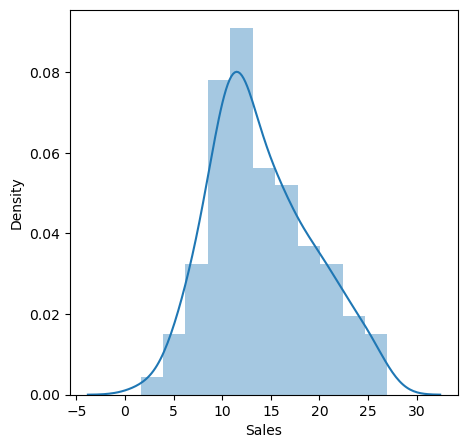

In [11]:
#Histogram construction for sales
plt.figure(figsize=(5,5))
sns.distplot(saledf['Sales'])
plt.show()

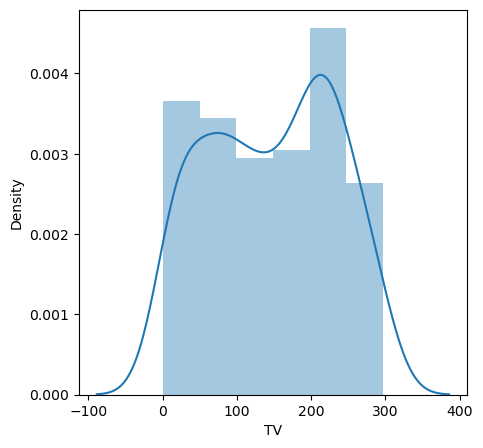

In [12]:
#Histogram construction for TV
plt.figure(figsize=(5,5))
sns.distplot(saledf['TV'])
plt.show()

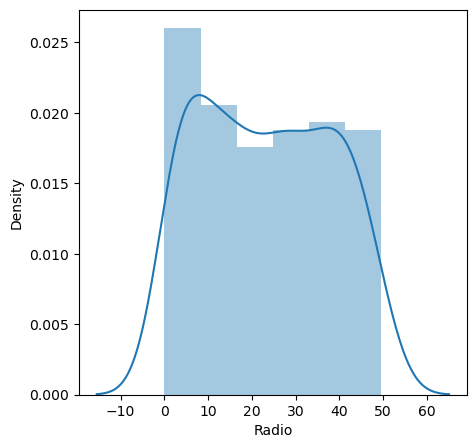

In [13]:
#Histogram construction for Radio
plt.figure(figsize=(5,5))
sns.distplot(saledf['Radio'])
plt.show()

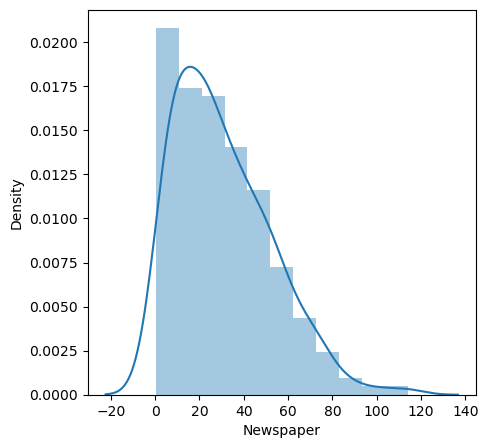

In [14]:
#Histogram construction for TV
plt.figure(figsize=(5,5))
sns.distplot(saledf['Newspaper'])
plt.show()

**ii)Scatter Plots**

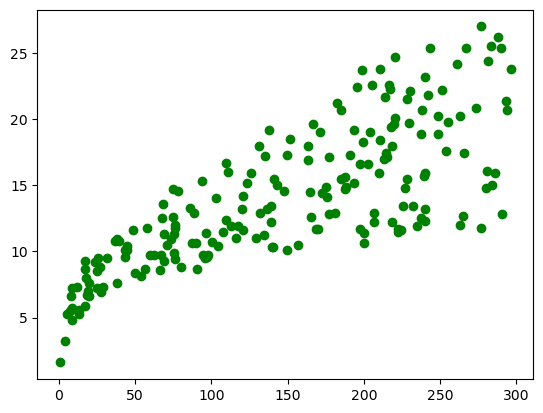

In [15]:
#TV scatter
plt.scatter(saledf["TV"],saledf["Sales"], color="green")

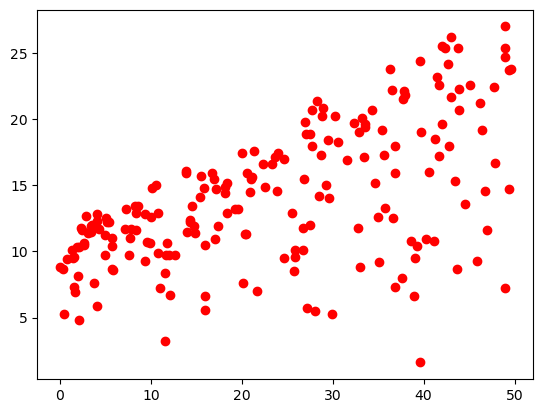

In [16]:
#Radio scatter
plt.scatter(saledf["Radio"],saledf["Sales"],color="red")

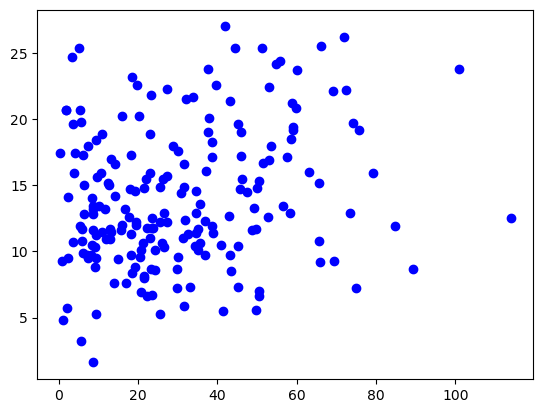

In [17]:
#Newspaper scatter
plt.scatter(saledf["Newspaper"],saledf["Sales"], color="blue")

## 5. Data Modelling

This is where we start with machine learning. We use a machine learning algorithm or a model where we train the model based on a subset of the dataset.

For this project, as mentioned previously, we will use Linear Regression

**a) Splitting the data**

First, we split the dataset into X(Input attributes) and Y(Target attribute) from which we will get the **train set**(subset used to train the model) and **test set**(subset used to test the trained model)

**i)Defining X and Y**

In [18]:
X=saledf.iloc[:,:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
Y=saledf.iloc[:,-1]
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**ii)Defining train and test**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

**b)Generation of the Model**

To make an Linear Regression model, we first use the LinearRegression Function and define a variable 'lr' to it. 

In [21]:
# Creation of linear regression model
lr= LinearRegression()

Then we train the model using the fit function

In [22]:
# Train the model using the training sets
lr.fit(X_train,Y_train)

LinearRegression()

## 6. Prediction, Testing and Evaluation

The final step is to first, make a prediction from our model and then, test it against our test set to see the accuracy and error of the model.

(How accurately can the model predict the sales produced from the amount spent on different types of advertising mediums)

**i)Definition and prediction done by the model**

In [23]:
# Definition of the prediction
Y_pred = lr.predict(X_test)
Y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [24]:
# calculating the coefficient
coefficient = lr.coef_
coefficient

array([0.04405928, 0.1992875 , 0.00688245])

In [25]:
#calculating the intercept
intercept = lr.intercept_
intercept

2.7089490925159083

In [26]:
X_new = np.array([[190.7,35.0,2.7],[80.5,7.3,180.1]])
#Prediction of the species
prediction = lr.predict(X_new)
print("Sales Prediction: {}".format(prediction))

Sales Prediction: [18.10469898  8.95004958]


**ii)Checking the accuracy and error of the model**

In [27]:
#print efficiency
accuracy=lr.score(X_train,Y_train)
print(accuracy*100,"%")

90.55159502227752 %


In [28]:
#Find the error between the actual values and the predicted values
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

Mean Absolute Error: 1.5116692224549089
Mean Squared Error: 3.7967972367152227
